# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_200_512_dr.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_200_512_dr_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(200 -> 512)
  (3): nn.Dropout(0.400000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 7.8905910143412)
('Valid Perplexity: ', 23.700125891221)
('Test Perplexity: ', 22.736589678571)


### Loss vs. Epoch

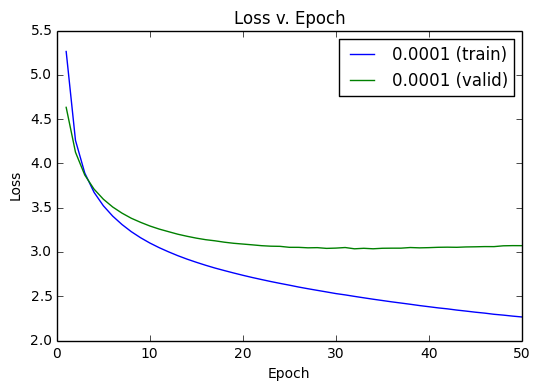

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

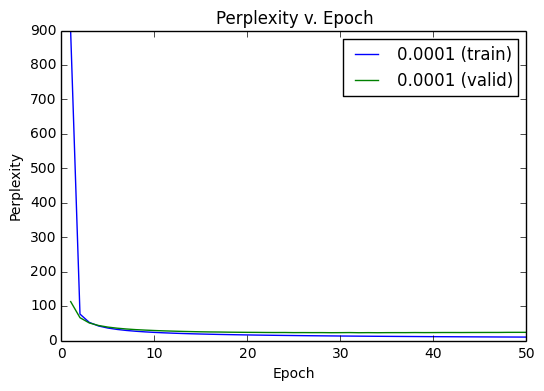

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  tex - mex waffles <begin_ingredients> 1 1 / 2 cups all - purpose flour <ing> 1 / 2 cup yellow cornmeal <ing> 1 1 / 3 cups longhorn cheese or 1 1 / 3 cups sharp cheddar cheese , grated <ing> 1 tablespoon baking powder <ing> 2 teaspoons sugar <ing> 1 / 2 teaspoon salt <ing> 1 teaspoon mild chili powder <ing> 1 2 / 3 cups milk <ing> 2 eggs , lightly beaten <ing> 1 / 3 cup vegetable oil <ing> 2 tablespoons finely chopped green chilies <end>

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . grease a 9x13 inch baking dish . <step> in a large bowl , combine the cream cheese , cream cheese , vanilla , sugar , and vanilla bean mixture . stir in the eggs , milk , and vanilla . pour the wet

True:  preheat the waffle maker . <step> in a large bowl , combine the flour , cornmeal , cheese , baking powder , sugar , salt and chili powder . add the milk , eggs , vegetable oil and chiles , and mix just until moistened . mixture may be a little lumpy . <step> bake in preheated waff

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  chocolate pancakes <begin_ingredients> 1 1 / 3 cups all purpose flour <ing> 1 / 3 cup plus 1 tablespoon cocoa powder <ing> 6 tablespoons granulated sugar <ing> 1 1 / 2 teaspoons baking powder <ing> 3 / 4 teaspoon salt <ing> 1 / 4 teaspoon baking soda <ing> 2 large eggs <ing> 3 tablespoons melted unsalted butter , plus extra for greasing pan and buttering pancakes <ing> 3 / 4 cup whole milk <ing> 1 / 2 cup whole milk <ing> 5 ounces semi - sweet chocolate , finely chopped <ing> 1 teaspoon pure vanilla extract <end>

Gend:  <beg> preheat the oven to 350 degrees . grease a 9 - inch cake pan with cooking spray . <step> in a large bowl , combine the flour , sugar , baking powder , baking soda , salt , and cinnamon . stir in the melted butter , and mix until combined . <step> in a

True:  1 in large bowl , sift together flour , cocoa , sugar , baking powder , salt , and baking soda . in medium bowl , whisk eggs , melted butter , and milk . pour liquid ingredients into dry and gently m

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  hummus with hen of the woods mushrooms <begin_ingredients> 1 cup pine nuts <ing> 1 tsp . extra - virgin olive oil , plus more <ing> canola oil , for frying <ing> 1 lb . thinly sliced mushrooms , preferably hen of the woods or oyster <ing> 1 lb . thinly sliced mushrooms , preferably hen of the woods or oyster <ing> kosher salt , to taste <ing> ¼ cup fresh lemon juice <ing> 2 cloves garlic , roughly chopped <ing> 12 oz . tahini ( available at amazon ) <ing> 6 cups canned chickpeas , rinsed <ing> 1 tsp . ground cumin <ing> 1 tbsp . finely chopped parsley <ing> paprika , to garnish <end>

Gend:  <beg> <end> the rice and rice in a large pot . <step> cook the rice according to the package directions . <step> in a large bowl , combine the rice , rice , rice vinegar , soy sauce , sugar , and salt . <step> add the rice and stir to combine . <step> add the

True:  1 . heat oven to 300 ° . toss pine nuts and olive oil in a bowl until evenly coated . transfer to a baking sheet ; bake , sti

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  0.14 

1-gram Score:  50.2
2-gram Score:  16.2
3-gram Score:  6
4-gram Score:  3.1
